# 문제

https://github.com/TEAMLAB-Lecture/AI-python-connect/blob/master/lab_assignments/lab_2/README.md

# for문 쓰면 안 됨, numpy로만 처리해야 함

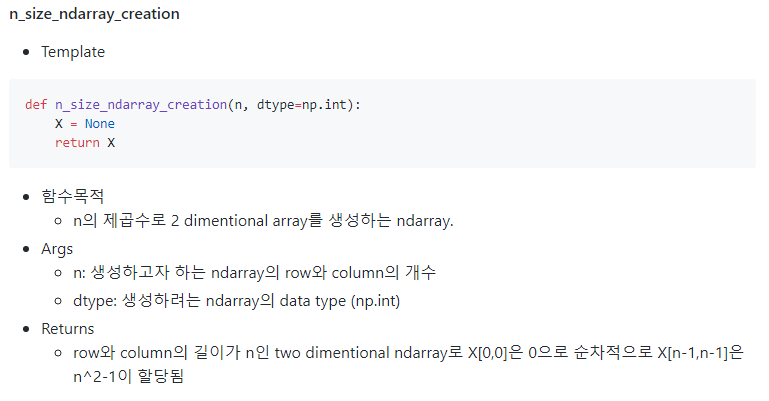

In [1]:
import numpy as np

In [2]:
def n_size_ndarray_creation(n, dtype = np.int):
    X = np.array(np.arange(n ** 2), dtype = dtype).reshape(n, n)
    return X

In [4]:
n_size_ndarray_creation(10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

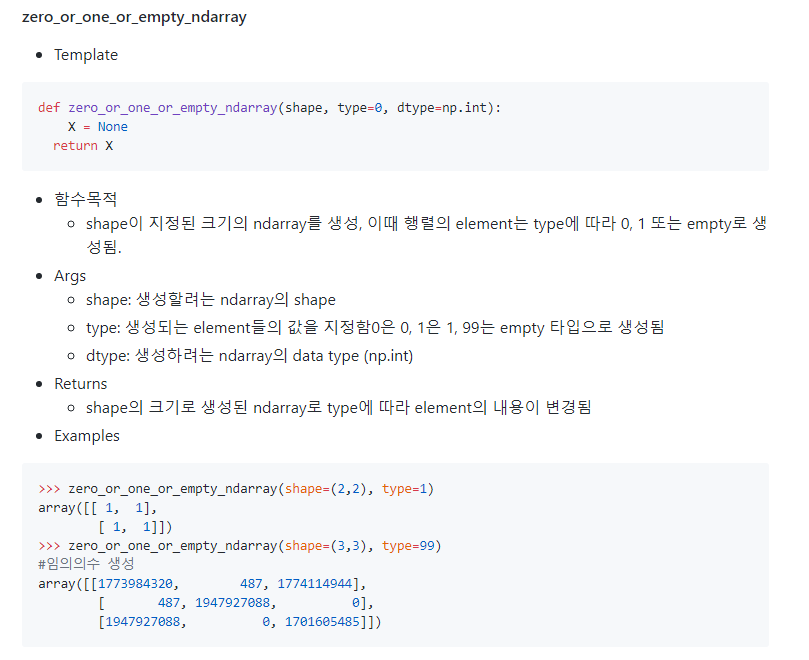

In [122]:
def zero_or_one_or_empty_ndarray(shape, type = 0, dtype = np.int): 
        if type == 0:
            X = np.zeros(shape, dtype = dtype)
        elif type == 1:
            X = np.ones(shape, dtype = dtype)
        elif type == 99:
            X = np.empty(shape, dtype = dtype)
        return X

In [125]:
zero_or_one_or_empty_ndarray(shape = (2, 2), dtype = np.int)

array([[0, 0],
       [0, 0]])

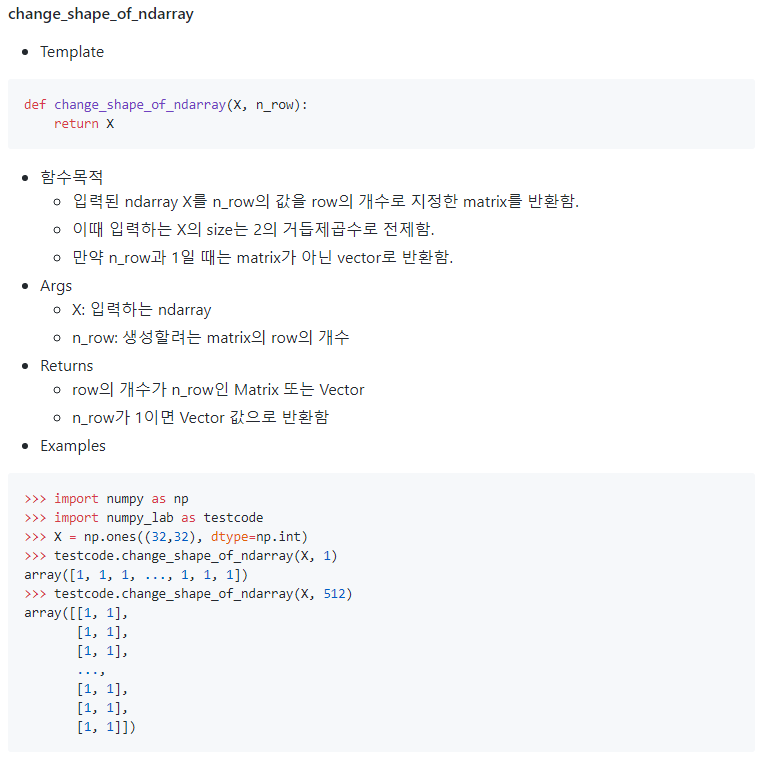

In [38]:
def change_shape_of_ndarray(X, n_row):
    if n_row != 1:
        X = X.reshape(-1, n_row)
    else:
        X = X.reshape(-1,)
    return X

In [42]:
change_shape_of_ndarray(np.ones((32, 32), dtype = np.int), 4)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

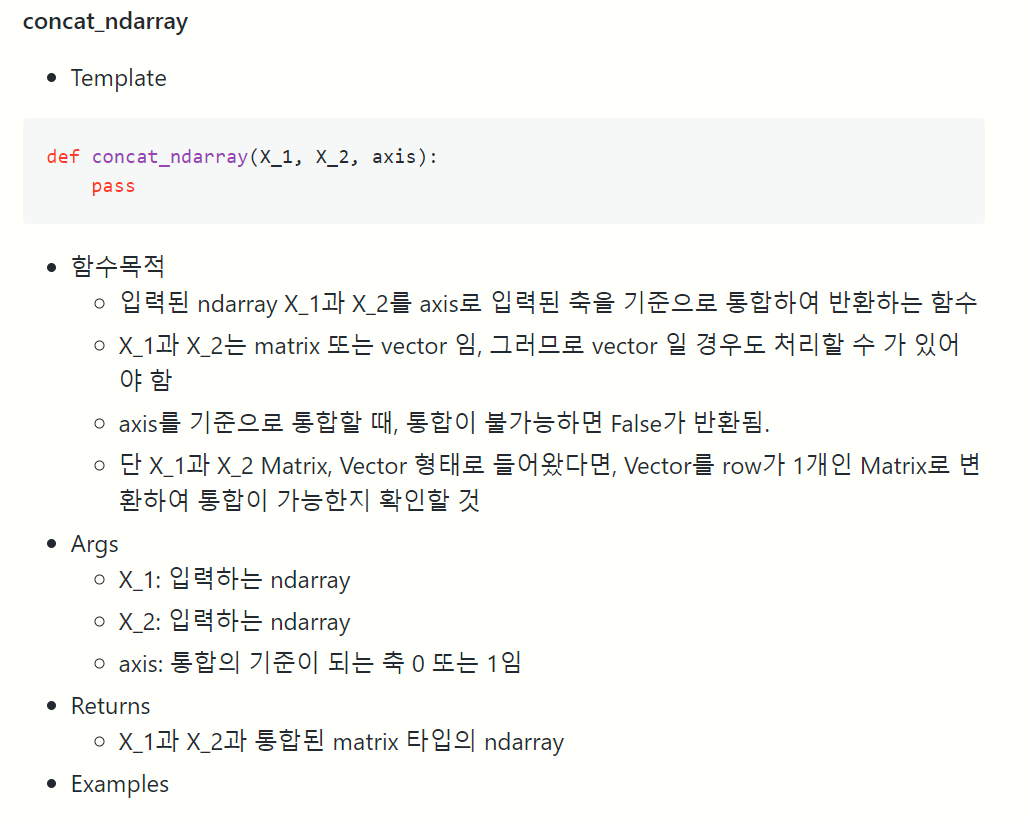

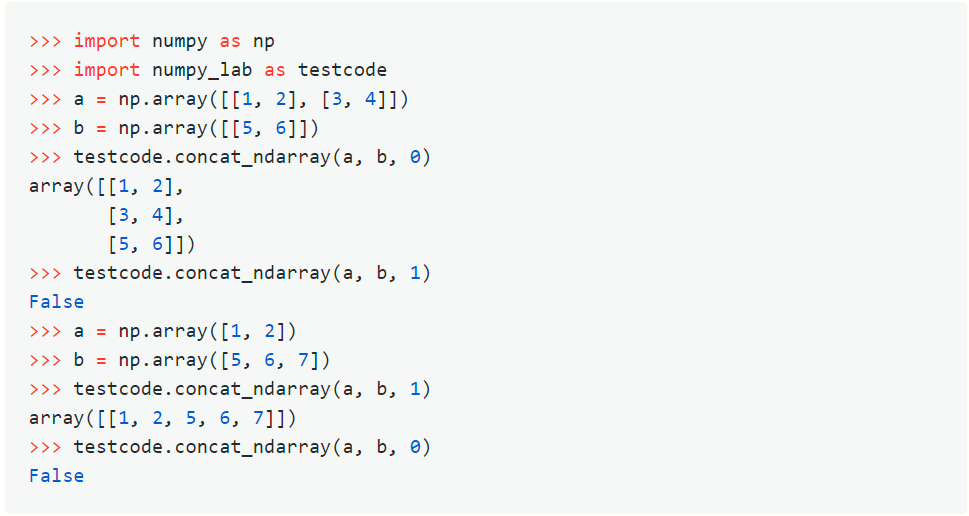

In [45]:
a = np.array([1, 2])
a.ndim

1

In [76]:
def concat_ndarray(X_1, X_2, axis):
    a = X_1.ndim
    b = X_2.ndim
    try:
        try:
            X = np.concatenate((X_1, X_2), axis)
        except:
            if a + b == 2:
                X = np.concatenate((X_1.reshape(1, -1), X_2.reshape(1, -1)), axis)
            elif a + b == 3:
                if a == 1:
                    X = np.concatenate((X_1.reshape(1, -1), X_2), axis)
                else:
                    X = np.concatenate((X_1, X_2.reshape(1, -1)), axis)
        return X

    except:
       return False

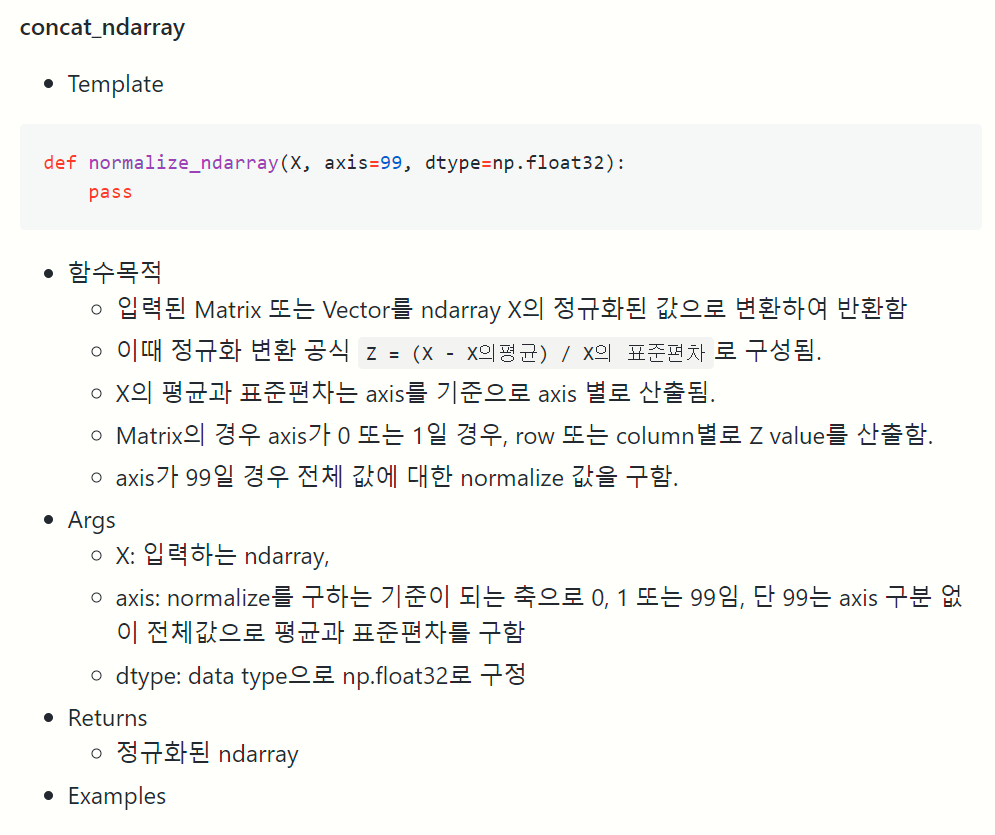

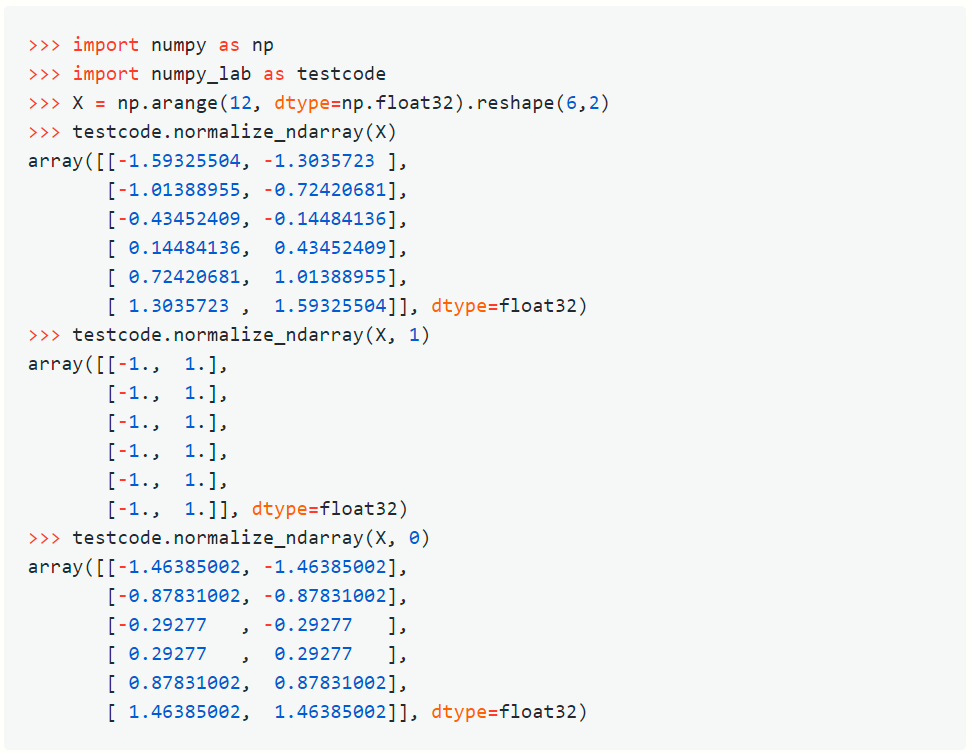

In [198]:
def normalize_ndarray(X, axis = 99, dype = np.float32):
    if axis == 99:
        X = (lambda x: (x - X.mean()) / X.std())(X)
    elif axis == 1:
        X = (lambda x: (x - X.mean(axis = axis).reshape(-1, 1)) 
             / X.std(axis = axis).reshape(-1, 1))(X)
    elif axis == 0:
         X = (lambda x: (x - X.mean(axis = axis)) 
             / X.std(axis = axis))(X)
    return X

In [193]:
X = np.arange(12).reshape(6, 2); X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [207]:
normalize_ndarray(X)

array([[-1.59325501, -1.30357228],
       [-1.01388955, -0.72420682],
       [-0.43452409, -0.14484136],
       [ 0.14484136,  0.43452409],
       [ 0.72420682,  1.01388955],
       [ 1.30357228,  1.59325501]])

In [184]:
(lambda x: (x - X.mean(axis = 0)) / X.std(axis = 0))(X)

array([[-1.46385011, -1.46385011],
       [-0.87831007, -0.87831007],
       [-0.29277002, -0.29277002],
       [ 0.29277002,  0.29277002],
       [ 0.87831007,  0.87831007],
       [ 1.46385011,  1.46385011]])

In [191]:
X.mean(axis = 1).reshape(-1, 1)

array([[ 0.5],
       [ 2.5],
       [ 4.5],
       [ 6.5],
       [ 8.5],
       [10.5]])

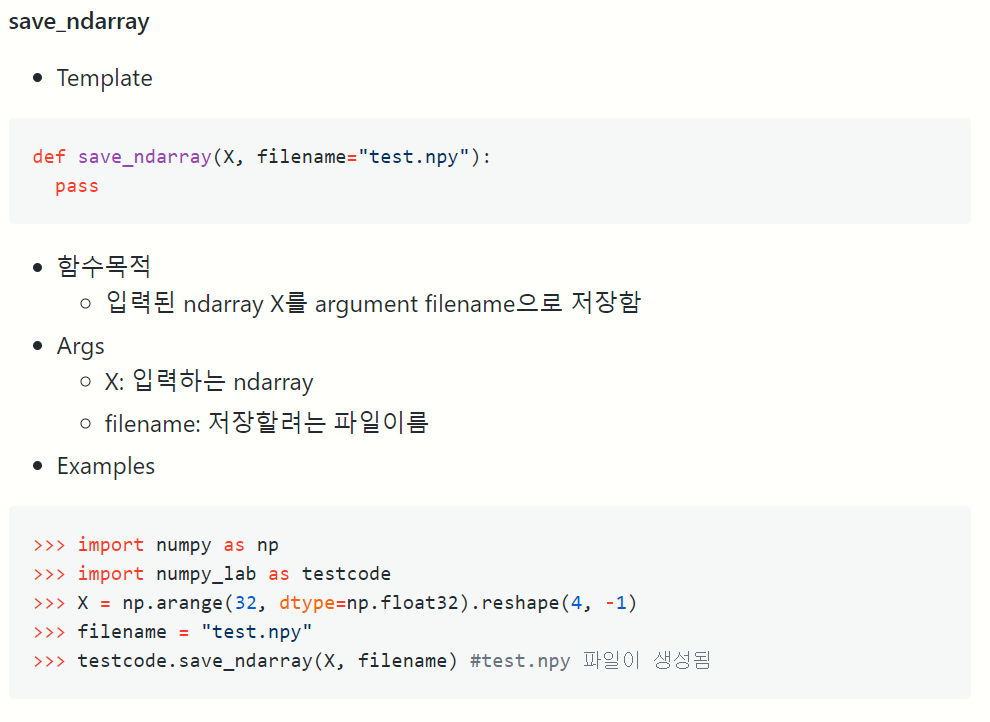

In [211]:
def save_ndarray(X, filename = 'test.npy'):
    np.save(filename, X)

In [212]:
X = np.arange(32, dtype = np.float32).reshape(4, -1)
filename = 'test.npy'
save_ndarray(X, filename)

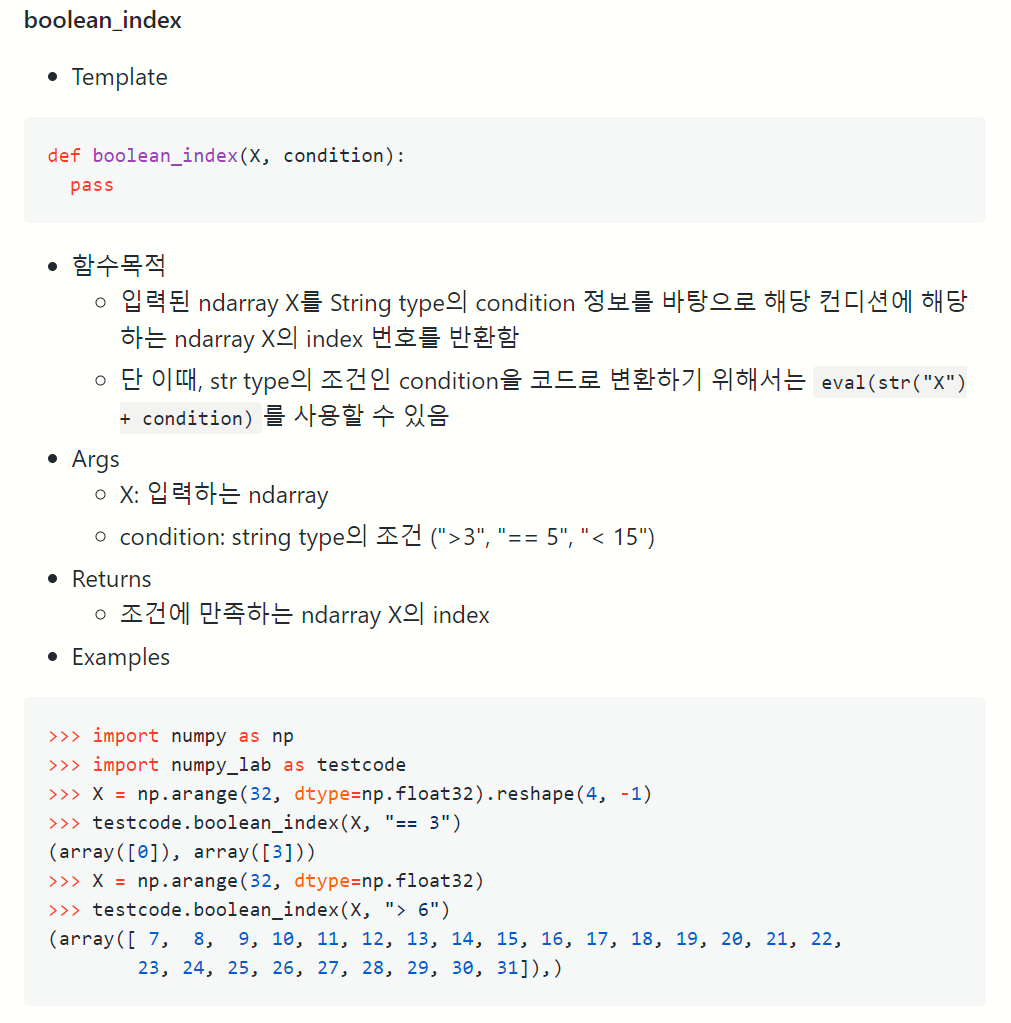

In [242]:
def boolean_index(X, condition):
    X = X[eval('X' + condition)]
    return X

In [216]:
X = np.arange(32, dtype = np.float32).reshape(4, -1);X

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11., 12., 13., 14., 15.],
       [16., 17., 18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29., 30., 31.]], dtype=float32)

In [246]:
boolean_index(X, '== 3')

array([3.], dtype=float32)

In [244]:
boolean_index(X, '>6')

array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
       20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.],
      dtype=float32)

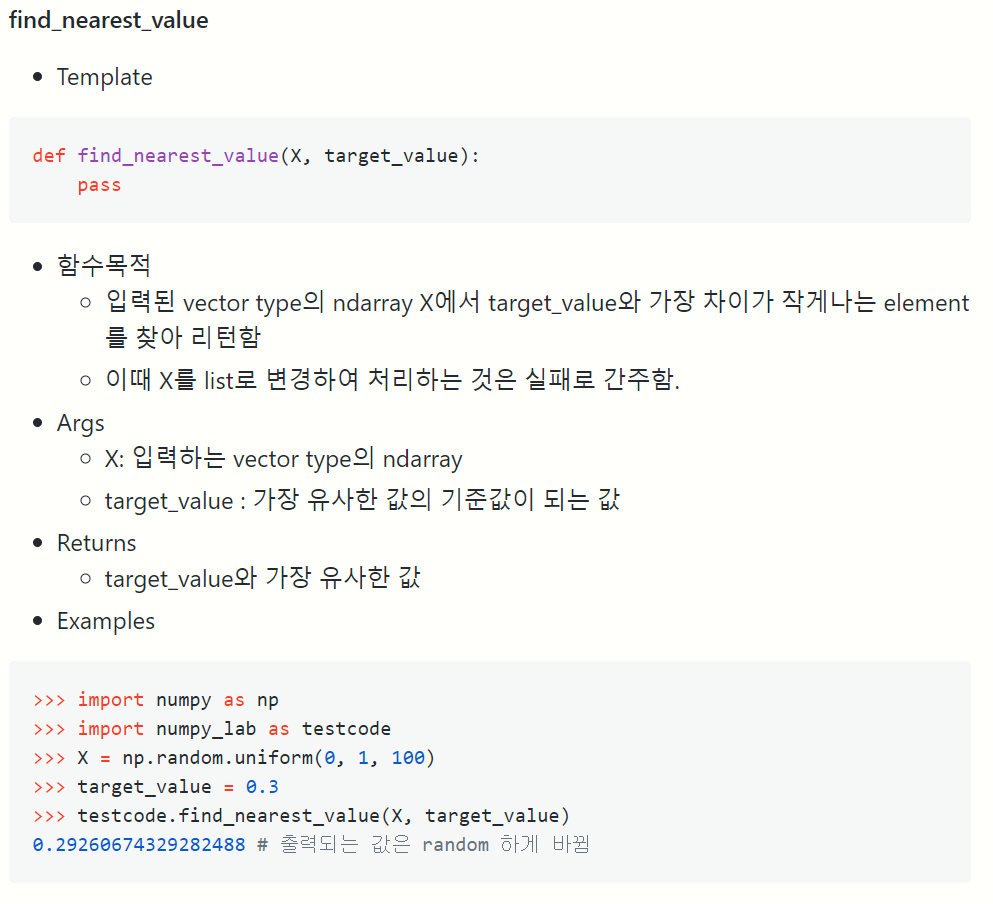

In [255]:
def find_nearest_value(X, target_value):
    X = X[np.argmin(abs(X - target_value))]
    return X

In [247]:
X = np.random.uniform(0, 1, 100); X

array([0.74762718, 0.32040127, 0.4964173 , 0.25214223, 0.42077446,
       0.83879093, 0.08315911, 0.45214726, 0.7225541 , 0.96002597,
       0.89343364, 0.45660189, 0.86513527, 0.12487192, 0.45071944,
       0.55370011, 0.41508846, 0.56714464, 0.74126014, 0.1024446 ,
       0.20635768, 0.16195918, 0.50034236, 0.37322021, 0.06090307,
       0.73963455, 0.90639145, 0.98560606, 0.95476731, 0.87637089,
       0.10769146, 0.30449417, 0.55748263, 0.68232002, 0.26651601,
       0.43859615, 0.05317927, 0.58340204, 0.65008277, 0.68452005,
       0.22595009, 0.36352889, 0.90579939, 0.70908947, 0.15780438,
       0.14041729, 0.02740175, 0.84399505, 0.2613696 , 0.46759643,
       0.38069711, 0.19524951, 0.8985998 , 0.39281955, 0.93221226,
       0.79876196, 0.85729463, 0.36193633, 0.39679676, 0.78207147,
       0.95438951, 0.90167251, 0.96427059, 0.60349119, 0.62257158,
       0.99268856, 0.66481336, 0.52446356, 0.59072557, 0.47494769,
       0.40099136, 0.21236355, 0.80639624, 0.89617019, 0.16690

In [256]:
find_nearest_value(X, 0.3)

0.30449416815214725

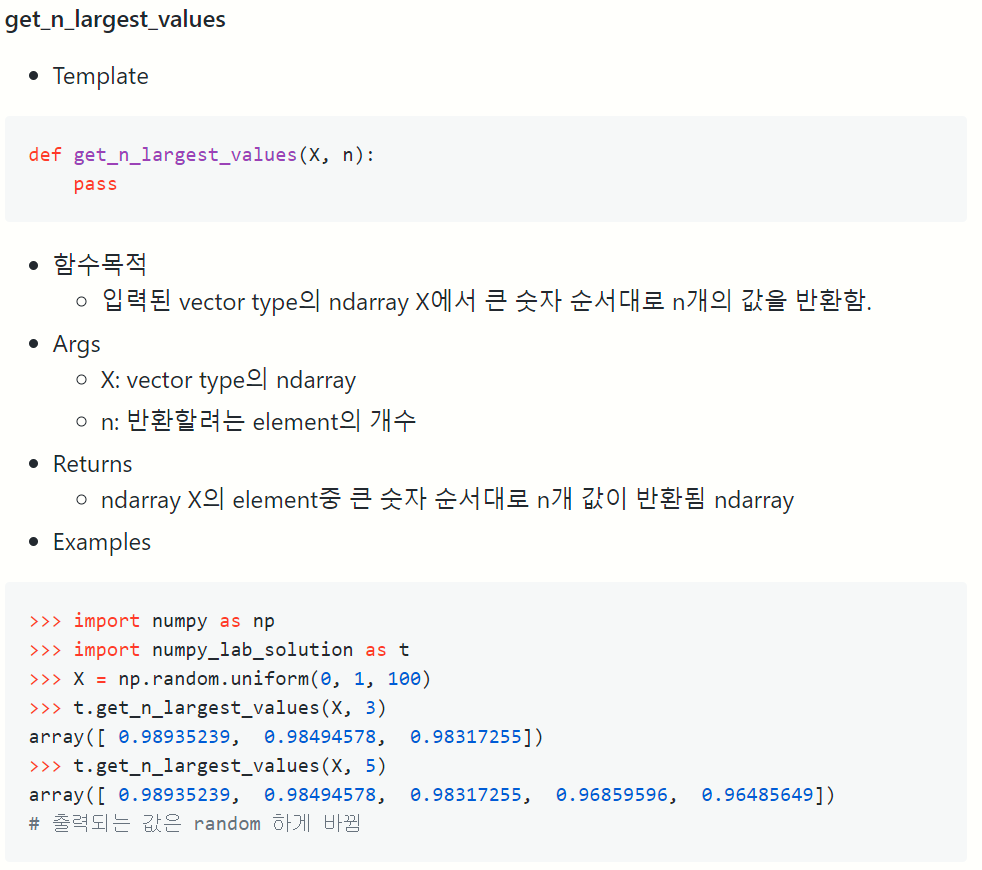

In [271]:
def get_n_largest_values(X, n):
    X = np.sort(X)[-(n)-1:-1]
    return X

In [257]:
X

array([0.74762718, 0.32040127, 0.4964173 , 0.25214223, 0.42077446,
       0.83879093, 0.08315911, 0.45214726, 0.7225541 , 0.96002597,
       0.89343364, 0.45660189, 0.86513527, 0.12487192, 0.45071944,
       0.55370011, 0.41508846, 0.56714464, 0.74126014, 0.1024446 ,
       0.20635768, 0.16195918, 0.50034236, 0.37322021, 0.06090307,
       0.73963455, 0.90639145, 0.98560606, 0.95476731, 0.87637089,
       0.10769146, 0.30449417, 0.55748263, 0.68232002, 0.26651601,
       0.43859615, 0.05317927, 0.58340204, 0.65008277, 0.68452005,
       0.22595009, 0.36352889, 0.90579939, 0.70908947, 0.15780438,
       0.14041729, 0.02740175, 0.84399505, 0.2613696 , 0.46759643,
       0.38069711, 0.19524951, 0.8985998 , 0.39281955, 0.93221226,
       0.79876196, 0.85729463, 0.36193633, 0.39679676, 0.78207147,
       0.95438951, 0.90167251, 0.96427059, 0.60349119, 0.62257158,
       0.99268856, 0.66481336, 0.52446356, 0.59072557, 0.47494769,
       0.40099136, 0.21236355, 0.80639624, 0.89617019, 0.16690

In [272]:
get_n_largest_values(X, 3)

array([0.97805566, 0.98560606, 0.99128429])